In [ ]:
## Standard libraries
import os
import math
import numpy as np
import time
from fastcore.all import *
from nbdev.showdoc import *

# Configure environment
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']='false' # Tells Jax not to hog all of the memory to this process.

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.auto import tqdm, trange
from autometric.geometry import PullbackMetric, LeviCivitaConnection, RiemannianManifold
from autometric.datasets import Torus, Saddle

import torch

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 3b Geodesic Testing
> Do they work?

**Hypothesis**: Stuff will happen

# Machinery

In [ ]:
path = S.connection.geodesic(S.X[0],S.X[1])

In [ ]:
times = 
path_points = path(times)

In [ ]:
Xs = np.vstack([S.X, path_points])

In [ ]:
Xs.shape

(2050, 3)

In [ ]:
from autometric.utils import plot_3d
def plot_geodesic(M, start_point, end_point, times = np.linspace(0,1,50)):
    path = M.connection.geodesic(start_point, end_point = end_point)
    intrinsic_path_points = path(times).detach()
    path_points = torch.func.vmap(M.immersion)(intrinsic_path_points).detach().numpy()
    X_with_path = np.vstack([M.X, path_points])
    signal = np.zeros(len(X_with_path))
    signal[-len(path_points):] = 1
    plot_3d(X_with_path, signal, use_plotly=True)
    return path_points

# Results

In [ ]:
S = Saddle(2000)

In [ ]:
tangent_vec = torch.zeros(3)
tangent_vec[1] = 1
path_points = plot_geodesic(S, S.intrinsic_coords[0], S.intrinsic_coords[1])

In [ ]:
def plot_intrinsic_geodesic(S, start_point, end_point):
    

In [ ]:
path = S.connection.geodesic(torch.tensor([0,1], dtype=float), end_point = torch.tensor([1,0], dtype=float))
intrinsic_path_points = path(times)

<matplotlib.collections.PathCollection>

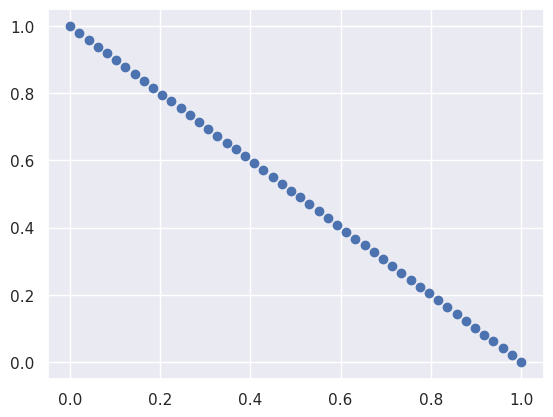

In [ ]:
plt.scatter(intrinsic_path_points[:,0], intrinsic_path_points[:,1])

## Torus

<matplotlib.collections.PathCollection>

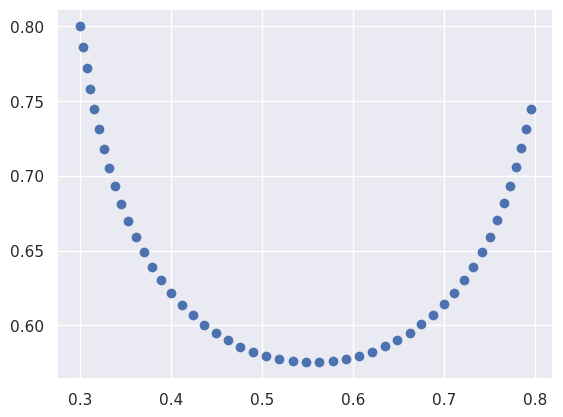

In [ ]:
T = Torus(2000)
start = torch.tensor([0.3, 0.8], dtype=float)
end = torch.tensor([0.8, 0.3], dtype=float)
path = T.connection.geodesic(start, end_point = end)
intrinsic_path_points = path(times).detach().numpy()
plt.scatter(intrinsic_path_points[:,0], intrinsic_path_points[:,1])

In [ ]:
T = Torus(2000)
ps = plot_geodesic(T, start, end)

<matplotlib.collections.PathCollection>

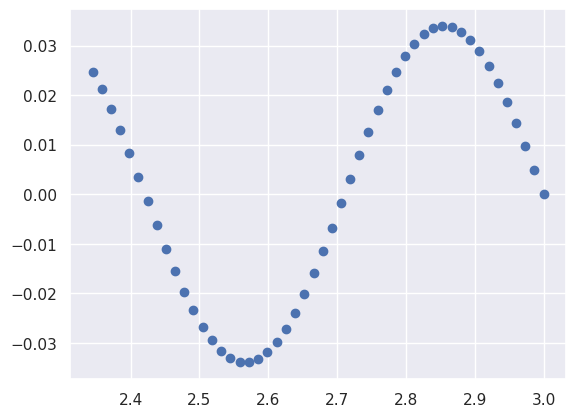

In [ ]:
T = Torus(2000)
start = torch.tensor([3.0, 0], dtype=float)
end = torch.tensor([0.8, 0.5], dtype=float)
path = T.connection.geodesic(start, end_point = end)
intrinsic_path_points = path(times).detach().numpy()
plt.scatter(intrinsic_path_points[:,0], intrinsic_path_points[:,1])

In [ ]:
T = Torus(2000)
ps = plot_geodesic(T, start, end)

## Sphere

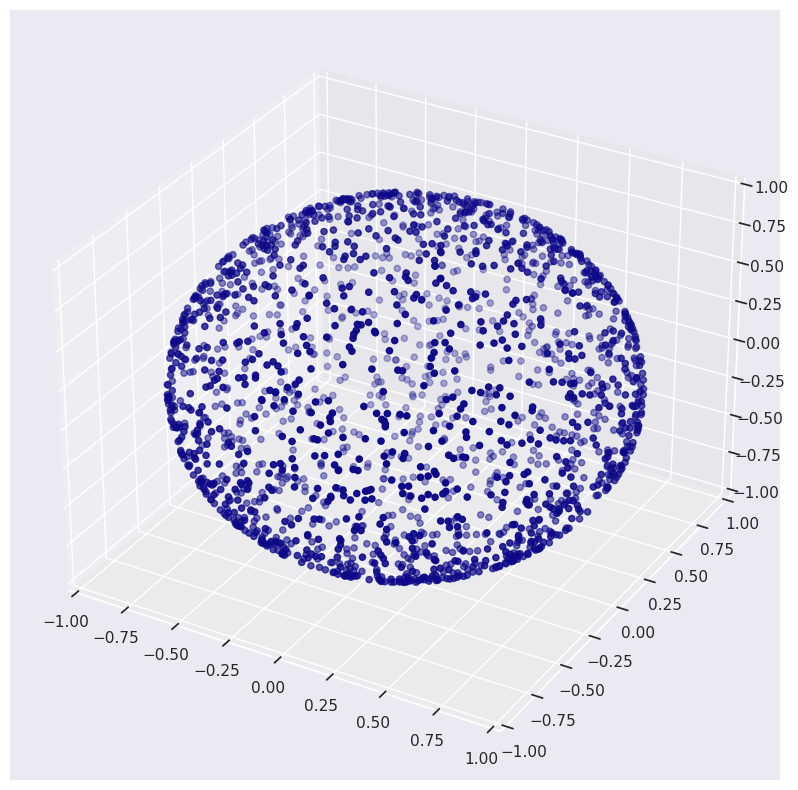

In [ ]:
S = Ellipsoid(2000, a = 1, b = 1, c = 1)
plot_3d(S.X)

<matplotlib.collections.PathCollection>

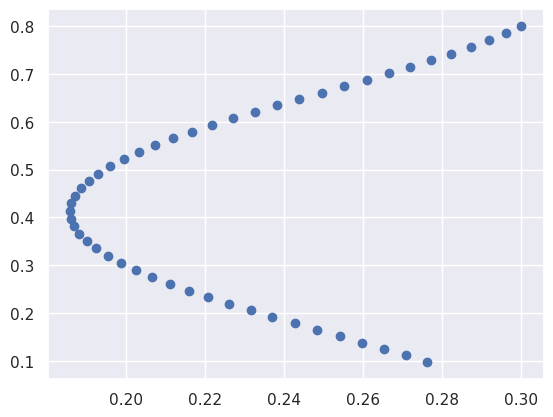

In [ ]:
start = torch.tensor([0.3,0.8], dtype=float)
end = torch.tensor([0.8, 0.3], dtype=float)
path = S.connection.geodesic(start, end_point = end)
intrinsic_path_points = path(times).detach().numpy()
plt.scatter(intrinsic_path_points[:,0], intrinsic_path_points[:,1])

In [ ]:
ps = plot_geodesic(S, start, end)

<matplotlib.collections.PathCollection>

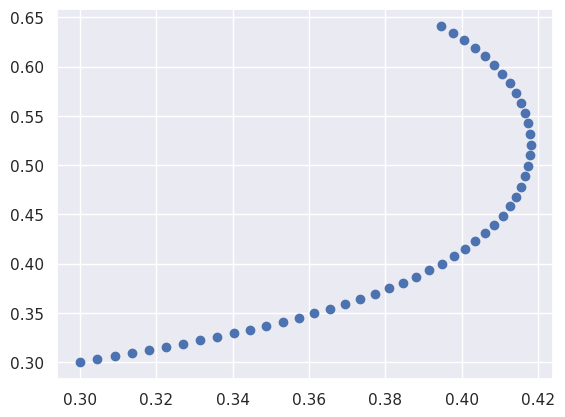

In [ ]:
S = Ellipsoid(2000, a = 1, b = 1, c = 1)
start = torch.tensor([0.3,0.3], dtype=float)
end = torch.tensor([0.5, 0.7], dtype=float)
path = S.connection.geodesic(start, end_point = end)
intrinsic_path_points = path(times).detach().numpy()
plt.scatter(intrinsic_path_points[:,0], intrinsic_path_points[:,1])

In [ ]:
S = Ellipsoid(2000, a = 1, b = 1, c = 1)
ps = plot_geodesic(S, start, end)

# Conclusion